In [1]:
%cd ..

/home/alta/Conversational/OET/al826/2022/shortcuts/OOD_generalisation


In [2]:
from src.analysis.model_analyser import ModelAnalyser

system_1 = ModelAnalyser('trained_models/baselines/imdb/0')
system_vecs_1 = system_1.get_cls_vectors('imdb', mode='dev', lim=1000, quiet=True)

system_2 = ModelAnalyser('trained_models/baselines/imdb/1')
system_vecs_2 = system_2.get_cls_vectors('imdb', mode='dev', lim=1000, quiet=True)

system_3 = ModelAnalyser('trained_models/baselines/imdb/2')
system_vecs_3 = system_3.get_cls_vectors('imdb', mode='dev', lim=1000, quiet=True)


###################
imdb
###################


Reusing dataset imdb (/home/alta/Conversational/OET/al826/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 824.16it/s]


###################
imdb
###################


Reusing dataset imdb (/home/alta/Conversational/OET/al826/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 813.42it/s]


###################
imdb
###################


Reusing dataset imdb (/home/alta/Conversational/OET/al826/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 846.86it/s]


In [3]:
import numpy as np

ex_ids = system_vecs_1.keys()
W1 = np.array([system_vecs_1[i] for i in ex_ids])
W2 = np.array([system_vecs_2[i] for i in ex_ids])
W3 = np.array([system_vecs_3[i] for i in ex_ids])

In [4]:
u1, s1, vh1 = np.linalg.svd(W1)
u2, s2, vh2 = np.linalg.svd(W2)
u3, s3, vh3 = np.linalg.svd(W3)


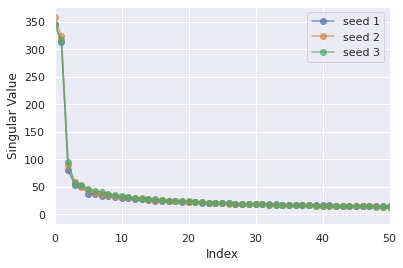

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.plot(s1, marker='o', alpha=0.7)
plt.plot(s2, marker='o', alpha=0.7)
plt.plot(s3, marker='o', alpha=0.7)

plt.xlim(0, 50)
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.legend(['seed 1', 'seed 2', 'seed 3'])

In [9]:
from sklearn.decomposition import PCA

pca1 = PCA()
pca1.fit(W1)
pca_data_1 = pca1.transform(W1)

pca2 = PCA()
pca2.fit(W2)
pca_data_2 = pca2.transform(W2)

pca3 = PCA()
pca3.fit(W3)
pca_data_3 = pca3.transform(W3)


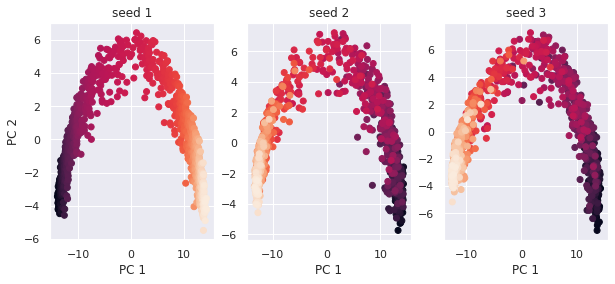

In [39]:
colors = np.linspace(1,10,len(pca_data_1[:,0]));
indx = np.argsort(pca_data_1[:,0])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,4))

ax[0].scatter(pca_data_1[:,0][indx], pca_data_1[:,1][indx], c=colors)
ax[0].set_ylabel('PC 2')
ax[0].set_xlabel('PC 1')
ax[0].set_title('seed 1')

ax[1].scatter(pca_data_2[:,0][indx], pca_data_2[:,1][indx], c=colors)
ax[1].set_xlabel('PC 1')
ax[1].set_title('seed 2')

ax[2].scatter(pca_data_3[:,0][indx], pca_data_3[:,1][indx], c=colors)
ax[2].set_xlabel('PC 1')
ax[2].set_title('seed 3')

plt.show()


In [48]:
system_4 = ModelAnalyser('trained_models/multi_task/imdb_rt_sst/0')
system_vecs_4 = system_4.get_cls_vectors('imdb', mode='dev', lim=1000, quiet=True)

W4 = np.array([system_vecs_4[i] for i in ex_ids])
pca4 = PCA()
pca4.fit(W4)
pca_data_4 = pca4.transform(W4)


In [51]:
system_5 = ModelAnalyser('trained_models/baselines/rt/0')
system_vecs_5 = system_5.get_cls_vectors('imdb', mode='dev', lim=1000, quiet=True)

W5 = np.array([system_vecs_5[i] for i in ex_ids])
pca5 = PCA()
pca5.fit(W5)
pca_data_5 = pca5.transform(W5)


###################
imdb
###################


Reusing dataset imdb (/home/alta/Conversational/OET/al826/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


  0%|          | 0/3 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1058.83it/s]


Text(0.5, 1.0, 'RT')

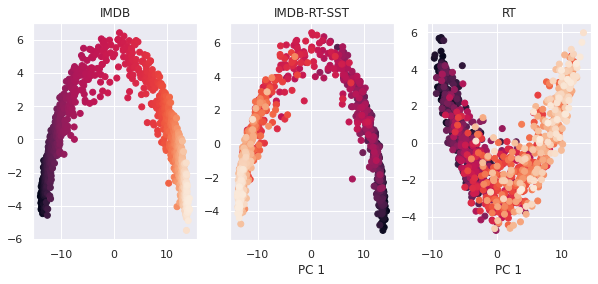

In [54]:
colors = np.linspace(1,10,len(pca_data_1[:,0]));
indx = np.argsort(pca_data_1[:,0])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,4))

ax[0].scatter(pca_data_1[:,0][indx], pca_data_1[:,1][indx], c=colors)
ax[0].set_title('IMDB')

ax[1].scatter(pca_data_4[:,0][indx], pca_data_4[:,1][indx], c=colors)
ax[1].set_xlabel('PC 1')
ax[1].set_title('IMDB-RT-SST')

ax[2].scatter(pca_data_5[:,0][indx], pca_data_5[:,1][indx], c=colors)
ax[2].set_xlabel('PC 1')
ax[2].set_title('RT')
